##**TEXT MINNING**

### **Analyse de sentiment des avis Yelp pour les restaurants.**

Chargement du dataset

In [ ]:
import pandas as pd

In [ ]:
yelp_data = pd.read_csv("yelp.csv")

Exploration du dataset

In [ ]:
print(yelp_data.head())
print(yelp_data.info())

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0  
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0  
2  0hT2KtfLiobPvh6cDC8JQg     0    

Importation de librairies nécessaires pour le nétoyage

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

Téléchargement des ressources nécessaires de NLTK

In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

Nettoyage des données textuelles

In [ ]:
def preprocess_text(text):
    text = re.sub(r'\d+', '', text)  # Retirer les chiffres
    text = re.sub(r'\W', ' ', text)  # Retirer les caractères spéciaux
    text = text.lower()  # Convertir en minuscules
    tokens = word_tokenize(text)  # Tokenizer
    tokens = [word for word in tokens if word not in stopwords.words('english')]  # Retirer les stopwords
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in tokens]  # Lemmatizer
    return ' '.join(tokens)

yelp_data['cleaned_text'] = yelp_data['text'].apply(preprocess_text)
print(yelp_data.head())

              business_id        date               review_id  stars  \
0  9yKzy9PApeiPPOUJEtnvkg  2011-01-26  fWKvX83p0-ka4JS3dc6E5A      5   
1  ZRJwVLyzEJq1VAihDhYiow  2011-07-27  IjZ33sJrzXqU-0X6U8NwyA      5   
2  6oRAC4uyJCsJl1X0WZpVSA  2012-06-14  IESLBzqUCLdSzSqm0eCSxQ      4   
3  _1QQZuf4zZOyFCvXc0o6Vg  2010-05-27  G-WvGaISbqqaMHlNnByodA      5   
4  6ozycU1RpktNG2-1BroVtw  2012-01-05  1uJFq2r5QfJG_6ExMRCaGw      5   

                                                text    type  \
0  My wife took me here on my birthday for breakf...  review   
1  I have no idea why some people give bad review...  review   
2  love the gyro plate. Rice is so good and I als...  review   
3  Rosie, Dakota, and I LOVE Chaparral Dog Park!!...  review   
4  General Manager Scott Petello is a good egg!!!...  review   

                  user_id  cool  useful  funny  \
0  rLtl8ZkDX5vH5nAx9C3q5Q     2       5      0   
1  0a2KyEL0d3Yb1V6aivbIuQ     0       0      0   
2  0hT2KtfLiobPvh6cDC8JQg     0 

Analyse de la distribution des notes

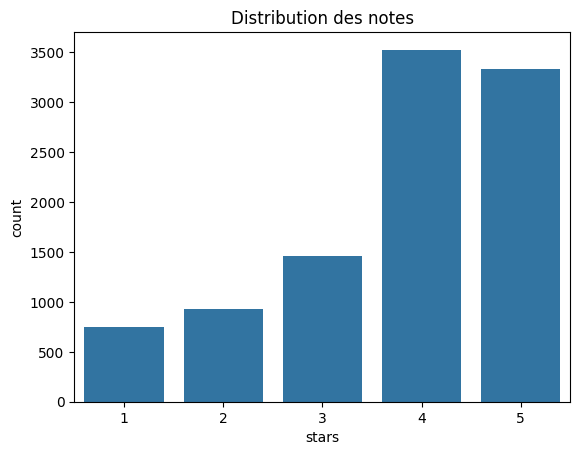

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='stars', data=yelp_data)
plt.title('Distribution des notes')
plt.show()

from collections import Counter

Séparation des avis positifs, négatifs et neutres

In [ ]:
positive_reviews = yelp_data[yelp_data['stars'] >= 4]['cleaned_text']
neutral_reviews = yelp_data[yelp_data['stars'] == 3]['cleaned_text']
negative_reviews = yelp_data[yelp_data['stars'] <= 2]['cleaned_text']

Identification des mots les plus fréquents dans les avis positifs et négatifs


In [ ]:
positive_words = ' '.join(positive_reviews).split()
negative_words = ' '.join(negative_reviews).split()

positive_word_freq = Counter(positive_words)
negative_word_freq = Counter(negative_words)

print('Mots les plus fréquents dans les avis positifs :', positive_word_freq.most_common(10))
print('Mots les plus fréquents dans les avis négatifs :', negative_word_freq.most_common(10))

Mots les plus fréquents dans les avis positifs : [('place', 4935), ('good', 4619), ('great', 4226), ('food', 3959), ('like', 3078), ('time', 3004), ('one', 2767), ('get', 2619), ('go', 2461), ('really', 2203)]
Mots les plus fréquents dans les avis négatifs : [('food', 1381), ('place', 1276), ('like', 1118), ('good', 945), ('one', 910), ('time', 884), ('get', 846), ('would', 788), ('service', 740), ('go', 689)]


Examen de la relation entre la longueur des avis et les notes attribuées

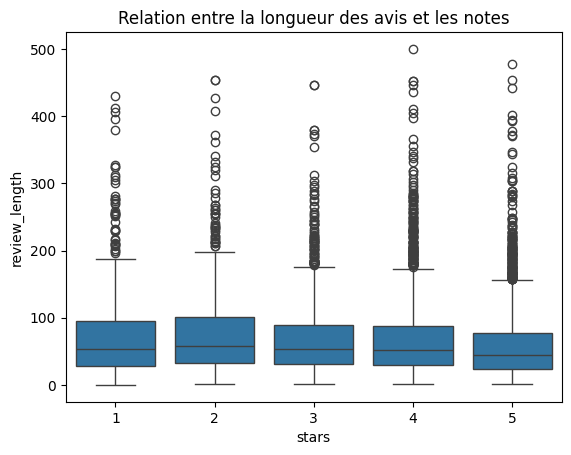

In [ ]:
yelp_data['review_length'] = yelp_data['cleaned_text'].apply(lambda x: len(x.split()))

sns.boxplot(x='stars', y='review_length', data=yelp_data)
plt.title('Relation entre la longueur des avis et les notes')
plt.show()

Importation de bibliothèques nécessaires pour la modélisation

In [ ]:
import sklearn
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

Catégorisation des avis

In [ ]:
yelp_data['sentiment'] = yelp_data['stars'].apply(lambda x: 'positive' if x >= 4 else ('negative' if x <= 2 else 'neutral'))

Vectorisation des avis

In [ ]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(yelp_data['cleaned_text'])

Division des données en ensembles d'entraînement et de test

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_matrix, yelp_data['sentiment'], test_size=0.2, random_state=42)

Modélisations

Modèle de régression logistique

In [ ]:
rl_classifier = LogisticRegression()
rl_classifier.fit(X_train, y_train)
y_pred = rl_classifier.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 150   23  135]
 [  23   49  217]
 [  21   16 1366]]
              precision    recall  f1-score   support

    negative       0.77      0.49      0.60       308
     neutral       0.56      0.17      0.26       289
    positive       0.80      0.97      0.88      1403

    accuracy                           0.78      2000
   macro avg       0.71      0.54      0.58      2000
weighted avg       0.76      0.78      0.74      2000



Identification des caractéristiques les plus importants (Régression Logistique)


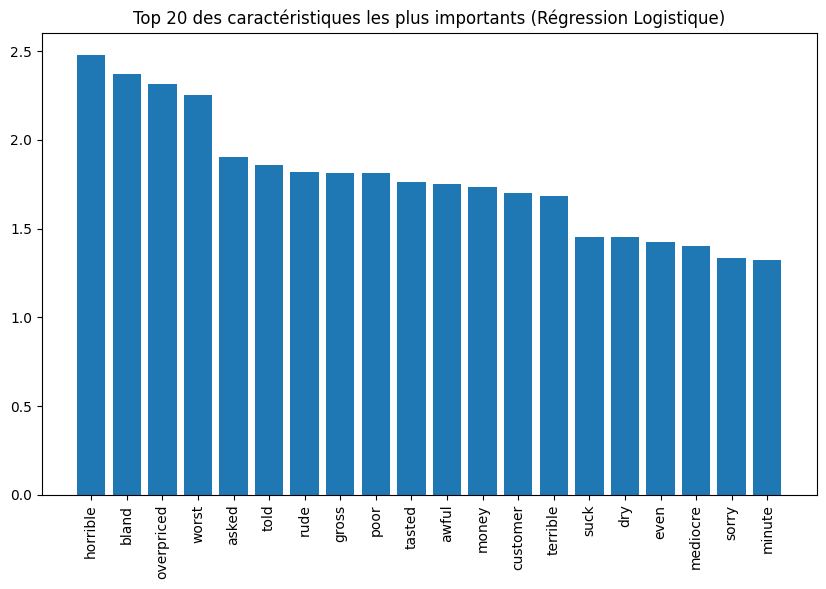

In [ ]:
feature_names = tfidf_vectorizer.get_feature_names_out()
coefficients = rl_classifier.coef_[0]
important_features = sorted(zip(coefficients, feature_names), reverse=True)[:20]
plt.figure(figsize=(10, 6))
plt.bar([x[1] for x in important_features], [x[0] for x in important_features])
plt.xticks(rotation=90)
plt.title("Top 20 des caractéristiques les plus importants (Régression Logistique)")
plt.show()

Modèle Random Forest

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
rf_pred = rf_classifier.predict(X_test)
print(confusion_matrix(y_test, rf_pred))
print(classification_report(y_test, rf_pred))

[[  48    2  258]
 [   3    2  284]
 [   1    4 1398]]
              precision    recall  f1-score   support

    negative       0.92      0.16      0.27       308
     neutral       0.25      0.01      0.01       289
    positive       0.72      1.00      0.84      1403

    accuracy                           0.72      2000
   macro avg       0.63      0.39      0.37      2000
weighted avg       0.68      0.72      0.63      2000



Identification des caractéristiques les plus importants (Random Forest)

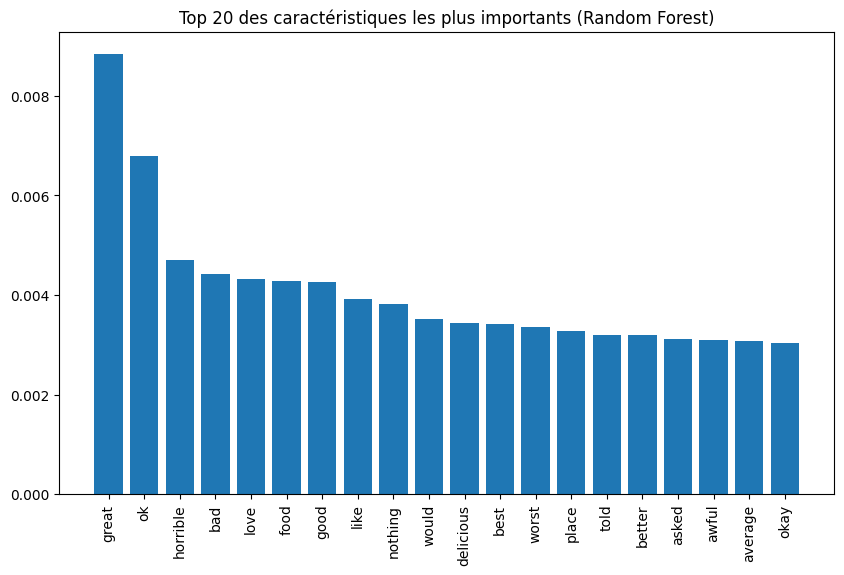

In [ ]:
feature_importance = rf_classifier.feature_importances_
feature_names = tfidf_vectorizer.get_feature_names_out()
important_features = sorted(zip(feature_importance, feature_names), reverse=True)[:20]
plt.figure(figsize=(10, 6))
plt.bar([x[1] for x in important_features], [x[0] for x in important_features])
plt.xticks(rotation=90)
plt.title("Top 20 des caractéristiques les plus importants (Random Forest)")
plt.show()

Analyse de l'évolution du sentiment au fil du temps

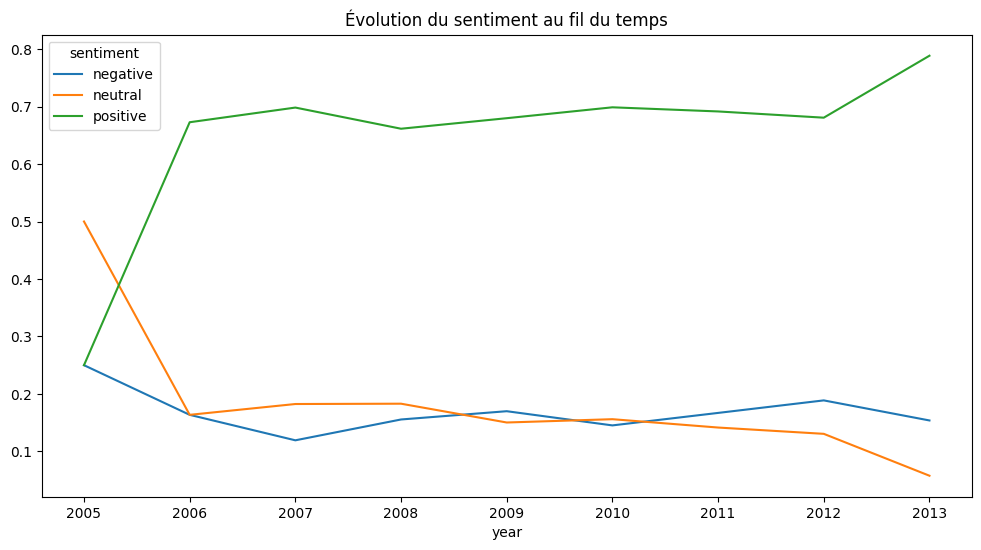

In [ ]:
yelp_data['date'] = pd.to_datetime(yelp_data['date'])
yelp_data['year'] = yelp_data['date'].dt.year

sentiment_over_time = yelp_data.groupby('year')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
sentiment_over_time.plot(kind='line', figsize=(12, 6))
plt.title('Évolution du sentiment au fil du temps')
plt.show()

Identification des aspects du service les plus souvent mentionnés

Importation de librairies nécessaires

In [ ]:
import wordcloud
from wordcloud import WordCloud

Nuage de mots dans les avis positifs

(-0.5, 799.5, 399.5, -0.5)

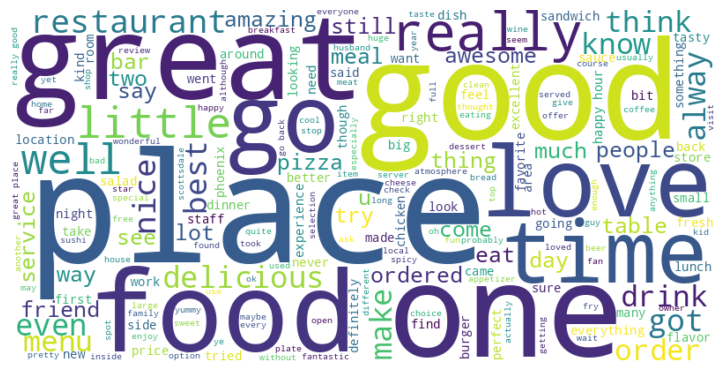

In [ ]:
positive_text = ' '.join(positive_reviews)
wordcloud_positive = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation='bilinear')
plt.axis('off')

Nuage de mots dans les avis négatifs

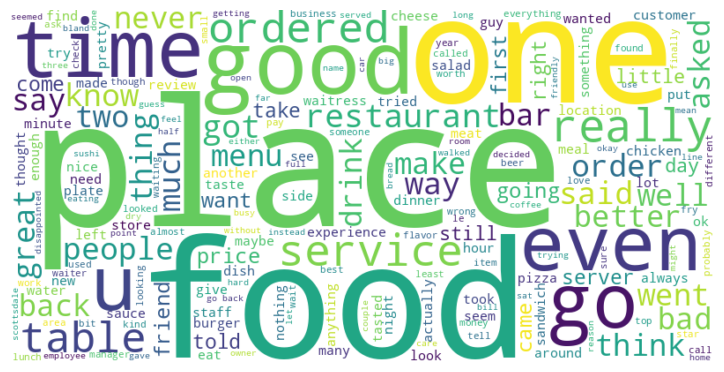

In [ ]:
negative_text = ' '.join(negative_reviews)
wordcloud_negative = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(20, 10))
plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation='bilinear')
plt.axis('off')
plt.show()

Détection des tendances saisonnières

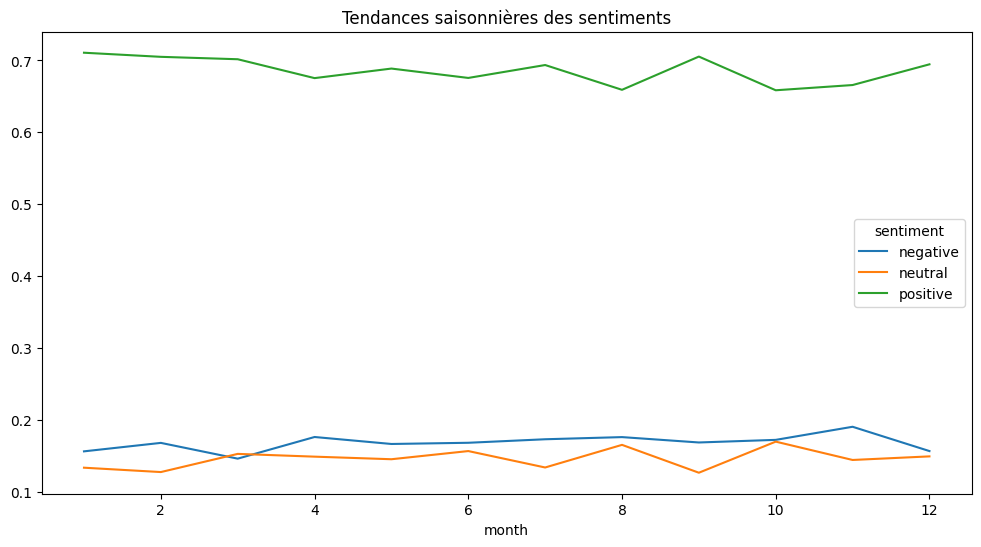

In [ ]:
yelp_data['month'] = yelp_data['date'].dt.month

sentiment_by_month = yelp_data.groupby('month')['sentiment'].value_counts(normalize=True).unstack().fillna(0)
sentiment_by_month.plot(kind='line', figsize=(12, 6))
plt.title('Tendances saisonnières des sentiments')
plt.show()